In [155]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'arial'

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import torch

from statistics import mean, stdev, mode, median

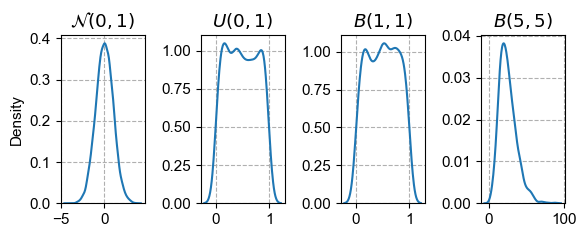

In [394]:
mu, sigma = 0, 1# mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
#define x-axis values
x = np.linspace (0, 1, 1000) 
#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.rvs(size=1000, a=5, scale=5)
y2 = stats.beta.rvs(size=1000, a=1, b=1)
fig, axes = plt.subplots(figsize=(6,2.5), ncols=4, nrows=1)
sns.kdeplot(np.random.normal(mu, sigma, 10000), ax=axes[0])
sns.kdeplot(np.random.uniform(size=1000), ax=axes[1])
sns.kdeplot(y2, ax=axes[2])
sns.kdeplot(y, ax=axes[3])
#axes[1][0].set_ylabel("Mobility / kg/s")
axes[0].set_title("$\mathcal{N}(0,1)$")
axes[0].grid(True, which='both', linestyle='--')
axes[1].set_title("$U(0,1)$")
axes[1].grid(True, which='both', linestyle='--')
axes[2].set_title("$B(1,1)$")
axes[2].grid(True, which='both', linestyle='--')
axes[3].set_title("$B(5,5)$")
axes[3].grid(True, which='both', linestyle='--')
axes[0].set_ylabel("Density")
axes[1].set_ylabel("")
axes[2].set_ylabel("")
axes[3].set_ylabel("")
#axes[1][0].grid(True, which='both', linestyle='--')
#axes[1][1].grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/priors.eps")
plt.savefig("../figuresReport/priors.png")

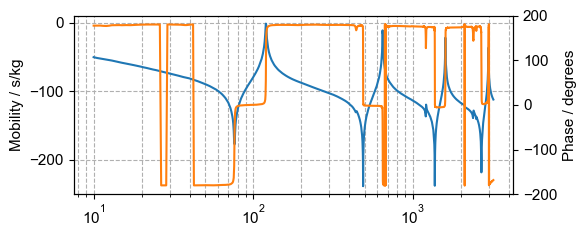

In [413]:


experiment = pd.read_csv("../Data/bend/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobilityPhase = experiment["force"].values + 1j*experiment["velocity"].values
mobilityPhase = np.angle(mobilityPhase, deg=True)
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)

freq = experiment["freq"]

goal = mobility[np.logical_and(mobility>0.2, mobility<0.75)]
goalFreq = freq[np.logical_and(mobility>0.2, mobility<0.75)]

fig, ax1 = plt.subplots(figsize=(6,2.5))
ax2 = ax1.twinx()

l1 = ax1.plot(freq, 20*np.log(mobility), color="tab:blue", label="mobility / s/kg")
#l2 = ax1.plot(goalFreq, goal, "x", color="tab:red", label="Points selected")
l3 = ax2.plot(freq, mobilityPhase, color="tab:orange", label="mobility / dB")


plt.xscale("log")
plt.xlabel("frequency / Hz")
ax1.set_ylabel("Mobility / s/kg")
ax2.set_ylabel("Phase / degrees")
ax2.set_ylim((-200, 200))
#ax1.legend(handles=l1+l3 )
ax1.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/bayesVibroPhase.eps")
plt.savefig("../figuresReport/bayesVibroPhase.png")

# Data Analysis
## Brass beam

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


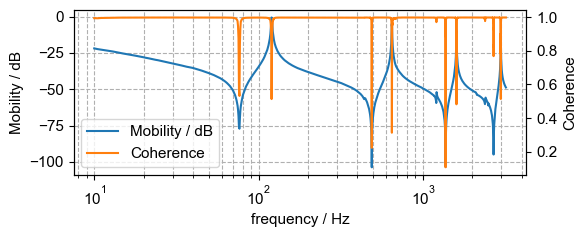

In [211]:
experiment = pd.read_csv("../Data/bend/centerCoherence.csv")[20:]
# Mobility value calculated from input data and converted to torch
coherence = experiment["Coherence"].values 
freq = experiment["freq"]

fig, ax1 = plt.subplots(figsize=(6,2.5))
ax2 = ax1.twinx()
l1 = ax1.plot(freq, 20*np.log10(mobility), label="Mobility / dB")
l2 = ax2.plot(freq, coherence, color="tab:orange", label="Coherence")

ax1.set_ylabel("Mobility / dB")
ax2.set_ylabel("Coherence")
ax1.legend( handles=l1+l2)

plt.xscale("log")
ax1.set_xlabel("frequency / Hz")

ax1.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig("../figuresReport/coherenceBrass.eps")
plt.savefig("../figuresReport/coherenceBrass.png")

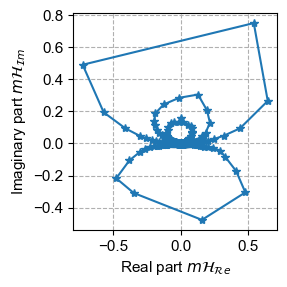

In [267]:
experiment = pd.read_csv("../Data/bend/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]
plt.figure(figsize=(3,3))
mobility = experiment["force"].values + 1j*experiment["velocity"].values

plt.plot(mobility.real, mobility.imag, "*-")
#-plt.plot(mobility[0].real, mobility[0].imag, "x")
#plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.xlabel("Real part $m \mathcal{H}_{\mathcal{R}e}$")
plt.ylabel("Imaginary part $m \mathcal{H}_{\mathcal{I}m}$")
plt.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/NyquistBrass.eps")
plt.savefig("../figuresReport/NyquistBrass.png")

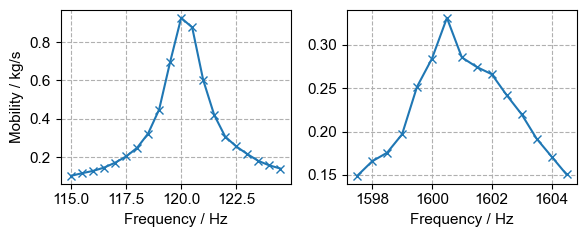

In [265]:
experiment = pd.read_csv("../Data/bend/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]
mob_dB = mobility
mobilityNorm = (mob_dB - mean(mob_dB))/stdev(mob_dB)

fig, axes = plt.subplots(figsize=(6,2.5), ncols=2, nrows=1)
axes[0].plot(freq[210:230], mobility[210:230], "x-")
axes[1].plot(freq[3175: 3190], mobility[3175: 3190], "x-")
#axes[0][1].plot(freq[1260:1285], mobility[1260:1285], "x-")
#axes[1][1].plot(freq[5930:5955], mobility[5930:5955], "x-")
axes[1].set_xlabel("Frequency / Hz")
axes[0].set_xlabel("Frequency / Hz")
#axes[1][0].set_ylabel("Mobility / kg/s")
axes[0].set_ylabel("Mobility / kg/s")
axes[0].grid(True, which='both', linestyle='--')
axes[1].grid(True, which='both', linestyle='--')
#axes[1][0].grid(True, which='both', linestyle='--')
#axes[1][1].grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/resonancesbrass.eps")
plt.savefig("../figuresReport/resonancesbrass.png")


## Frat PLA beam

In [315]:
import scipy.io as sio

data = sio.loadmat("../Data/laser/references/scanFlatBeamCornerMiddleLimit.mat")
ref = sio.loadmat("../Data/laser/references/FlatBeamRefCenter.mat")

tf_center = data["y_FRF_vel"][1] / ref["y_FRF_vel"][0]
tf_corner = data["y_FRF_vel"][0] / ref["y_FRF_vel"][0]
tf_center_dB = 20*np.log10(abs(tf_center))
tf_corner_dB = 20*np.log10(abs(tf_corner))


In [316]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'usd_FRF_acc', 'usd_FRF_disp', 'usd_FRF_vel', 'usd_coh', 'x_FRF_acc', 'x_FRF_disp', 'x_FRF_vel', 'x_coh', 'y_FRF_acc', 'y_FRF_disp', 'y_FRF_vel', 'y_coh'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


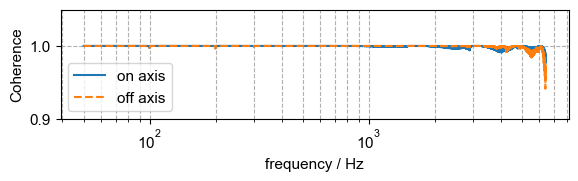

In [334]:


fig, ax1 = plt.subplots(figsize=(6,2))

l1 = ax1.plot(data["x_FRF_disp"][0], data["y_coh"][1].T, label="on axis")
ax1.plot(data["x_FRF_disp"][0], data["y_coh"][0].T, '--',color="tab:orange", label="off axis")

ax1.set_ylabel("Coherence")
ax1.set_ylim([0.9, 1.05])
ax1.legend()

ax1.set_xscale("log")
ax1.set_xlabel("frequency / Hz")

ax1.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig("../figuresReport/coherenceFlatPLA.eps")
plt.savefig("../figuresReport/coherenceFlatPLA.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


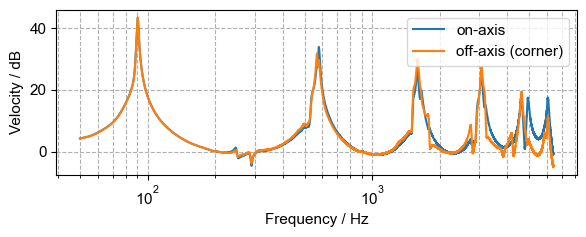

In [318]:

fig, ax1 = plt.subplots(figsize=(6,2.5))
plt.plot(data["x_FRF_disp"][0], tf_center_dB, label="on-axis")
plt.plot(data["x_FRF_disp"][0], tf_corner_dB, label="off-axis (corner)")

plt.grid(True, which='both', linestyle='--')

plt.ylabel("Velocity / dB")
plt.xlabel("Frequency / Hz")
plt.xscale("log")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("../figuresReport/resonancesFlatPLA.eps")
plt.savefig("../figuresReport/resonancesFlatPLA.png")


In [274]:
np.shape(tf_center.real[0])

(12701,)

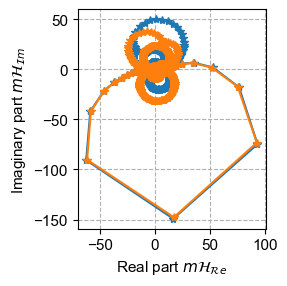

In [310]:
plt.figure(figsize=(3,3))
plt.plot(tf_center.real, tf_center.imag, "*-", label="on-axis")
plt.plot(tf_corner.real, tf_corner.imag, "*-", label="off-axis (corner)")
#-plt.plot(mobility[0].real, mobility[0].imag, "x")
#plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.xlabel("Real part $m \mathcal{H}_{\mathcal{R}e}$")
plt.ylabel("Imaginary part $m \mathcal{H}_{\mathcal{I}m}$")
plt.grid(True, which='both', linestyle='--')
#plt.legend()
plt.tight_layout()
plt.savefig("../figuresReport/NyquistFlatPLA.eps")
plt.savefig("../figuresReport/NyquistFlatPLA.png")

In [347]:
import scipy.io as sio

data = sio.loadmat("../Data/laser/references/scanCurveBeamCornerMiddleLimit.mat")
ref = sio.loadmat("../Data/laser/references/curveBeamRefCenter.mat")

tf_center = data["y_FRF_disp"][1] / ref["y_FRF_disp"][0]
tf_corner = data["y_FRF_disp"][0] / ref["y_FRF_disp"][0]
tf_center_dB = 20*np.log10(abs(data["y_FRF_disp"][1] / ref["y_FRF_disp"]))
tf_corner_dB = 20*np.log10(abs(data["y_FRF_disp"][0] / ref["y_FRF_disp"]))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


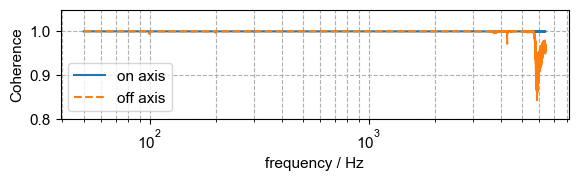

In [348]:

fig, ax1 = plt.subplots(figsize=(6,2))

l1 = ax1.plot(data["x_FRF_disp"][0], data["y_coh"][1].T, label="on axis")
ax1.plot(data["x_FRF_disp"][0], data["y_coh"][0].T, '--',color="tab:orange", label="off axis")

ax1.set_ylabel("Coherence")
ax1.set_ylim([0.8, 1.05])
ax1.legend()

ax1.set_xscale("log")
ax1.set_xlabel("frequency / Hz")

ax1.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig("../figuresReport/coherenceCurvePLA.eps")
plt.savefig("../figuresReport/coherenceCurvePLA.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


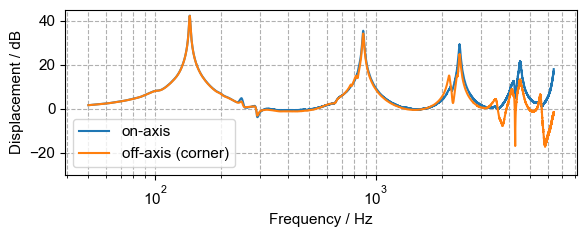

In [356]:
fig, ax1 = plt.subplots(figsize=(6,2.5))
plt.plot(data["x_FRF_disp"][0], tf_center_dB.T, label="on-axis")
plt.plot(data["x_FRF_disp"][0], tf_corner_dB.T, label="off-axis (corner)")

plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.ylim([-30, 45])
plt.ylabel("Displacement / dB")
plt.xlabel("Frequency / Hz")
plt.xscale("log")
plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig("../figuresReport/resonancesCurvePLA.eps")
plt.savefig("../figuresReport/resonancesCurvePLA.png")


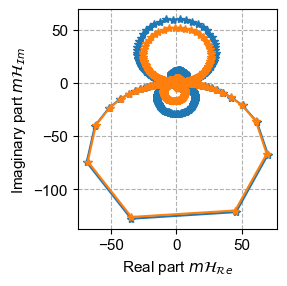

In [357]:
plt.figure(figsize=(3,3))
plt.plot(tf_center.real, tf_center.imag, "*-", label="on-axis")
plt.plot(tf_corner.real, tf_corner.imag, "*-", label="off-axis (corner)")
#-plt.plot(mobility[0].real, mobility[0].imag, "x")
#plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.xlabel("Real part $m \mathcal{H}_{\mathcal{R}e}$")
plt.ylabel("Imaginary part $m \mathcal{H}_{\mathcal{I}m}$")
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.savefig("../figuresReport/NyquistCurvePLA.eps")
plt.savefig("../figuresReport/NyquistCurvePLA.png")

In [188]:
experiment = pd.read_csv("../Data/laser/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]
plt.figure(figsize=(4,4))
mobility = experiment["force"].values + 1j*experiment["velocity"].values

plt.plot(mobility.real, mobility.imag, "*-")
#-plt.plot(mobility[0].real, mobility[0].imag, "x")
#plt.plot(mobility[-1].real, mobility[-1].imag, ".")
plt.xlabel("Real part $m \mathcal{H}_{\mathcal{R}e}$")
plt.ylabel("Imaginary part $m \mathcal{H}_{\mathcal{I}m}$")
plt.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/NyquistCurvePLA.eps")
plt.savefig("../figuresReport/NyquistCurvePLA.png")

FileNotFoundError: [Errno 2] No such file or directory: '../Data/laser/centerFreqResponse.csv'

In [ ]:
experiment = pd.read_csv("../Data/laser/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]
mob_dB = mobility
mobilityNorm = (mob_dB - mean(mob_dB))/stdev(mob_dB)

fig, axes = plt.subplots(figsize=(6,6), ncols=2, nrows=2)
axes[0][0].plot(freq[210:230], mobility[210:230], "x-")
axes[0][1].plot(freq[1260:1285], mobility[1260:1285], "x-")
axes[1][0].plot(freq[3175: 3190], mobility[3175: 3190], "x-")
axes[1][1].plot(freq[5930:5955], mobility[5930:5955], "x-")
axes[1][1].set_xlabel("Frequency / Hz")
axes[1][0].set_xlabel("Frequency / Hz")
axes[1][0].set_ylabel("Mobility / kg/s")
axes[0][0].set_ylabel("Mobility / kg/s")
axes[0][0].grid(True, which='both', linestyle='--')
axes[0][1].grid(True, which='both', linestyle='--')
axes[1][0].grid(True, which='both', linestyle='--')
axes[1][1].grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.savefig("../figuresReport/resonancesPLAflat.eps")
plt.savefig("../figuresReport/resonancesPLAflat.png")


0.28983081122086574
0.12981182607734118


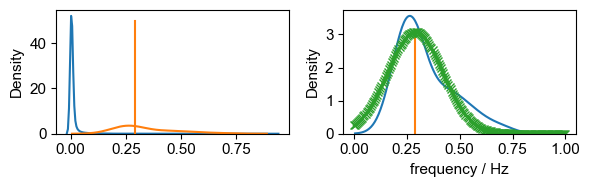

In [28]:


experiment = pd.read_csv("../Data/bend/centerFreqResponse.csv")[20:]
# Mobility value calculated from input data and converted to torch
mobility = abs(experiment["force"].values + 1j*experiment["velocity"].values)
freq = experiment["freq"]

goal = mobility[np.logical_and(mobility>0.2, mobility<0.75)]
goalFreq = freq[np.logical_and(mobility>0.2, mobility<0.75)]

fig, axes = plt.subplots(figsize=(6,2), ncols=2)
sns.kdeplot( mobility,label="Entire signal", ax=axes[0])
sns.kdeplot(goal, label="values selected", color="tab:orange", ax=axes[0])

meanDist2 = mode(mobility)
meanDist = median(goal)
stdDist = stdev(goal)
print(meanDist)
print(stdDist)
x = np.linspace(0, 1, 200)
sns.kdeplot(goal, ax=axes[1])
axes[0].plot([meanDist,meanDist], [0,50])
axes[1].plot([meanDist,meanDist], [0,3])
axes[1].plot(x, stats.norm.pdf(x, meanDist, stdDist), "x-")

plt.xlabel("frequency / Hz")
ax2.set_ylabel("Density")
ax1.legend()

plt.tight_layout()
plt.savefig("../figuresReport/movDensity.eps")
plt.savefig("../figuresReport/movDensity.png")

# Results Section

In [414]:
import pickle
with open('../figuresReport/MCMCfirst.pkl', 'rb') as f:
    MCMCresults = pickle.load(f)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


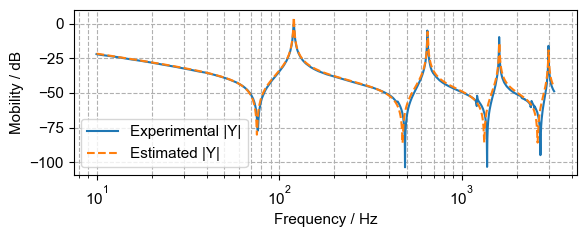

In [415]:

freq = MCMCresults["freq"]
mobEst = MCMCresults["mobMCMC_dB"]
mobExp = MCMCresults["mobExp_dB"]


fig, axes = plt.subplots(figsize=(6,2.5), nrows=1)
axes.plot(freq, mobExp, label="Experimental |Y|")
axes.plot(freq, mobEst, "--", label="Estimated |Y|")
axes.set_xlabel("Frequency / Hz")
axes.set_ylabel("Mobility / dB")
axes.set_xscale("log")
axes.legend()

axes.grid(True, which='both', linestyle='--')
plt.tight_layout()

plt.savefig("../figuresReport/MCMCfirst.eps")
plt.savefig("../figuresReport/MCMCfirst.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


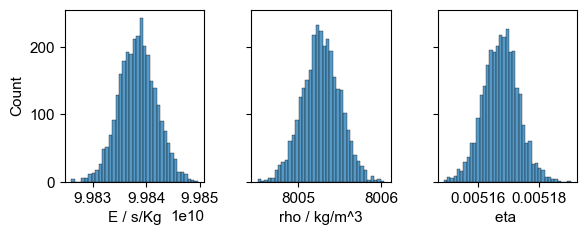

In [416]:

def normalization(E, rho, eta):
    E_theo=torch.tensor(10e10)
    E_var_init =torch.tensor(5.0e9)
    rho_theo=torch.tensor(8000.0)
    rho_var_init =torch.tensor(250.0)
    eta_mean=torch.tensor(0.00505)
    eta_var_init =torch.tensor( 0.006)
    
    rho_norm = rho*rho_var_init + rho_theo
    eta_norm = eta*eta_var_init + eta_mean
    E_norm = E*E_var_init + E_theo

    return E_norm, rho_norm, eta_norm
post = MCMCresults["posterior_samples"]
E, rho, eta = normalization(post["E"], post["rho"], post["eta"])
fig, axes = plt.subplots(figsize=(6,2.5), ncols=3, sharey=True)
sns.histplot(E, ax=axes[0])
axes[0].set_xlabel("E / s/Kg")
sns.histplot(rho, ax=axes[1])
axes[1].set_xlabel("rho / kg/m^3")
sns.histplot(eta, ax=axes[2])
axes[2].set_xlabel("eta ")
plt.tight_layout()

plt.savefig("../figuresReport/MCMCfirstPost.eps")
plt.savefig("../figuresReport/MCMCfirstPost.png")

In [417]:
import pickle
with open('../figuresReport/SVIresults.pkl', 'rb') as f:
    SVIresults = pickle.load(f)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


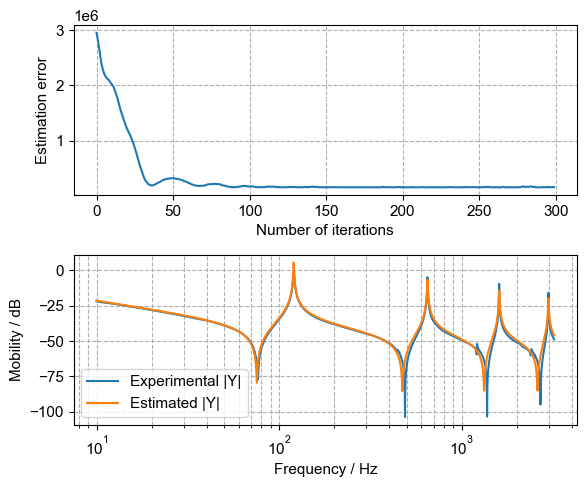

In [418]:
losses = SVIresults["losses"]
freq = SVIresults["freq"]
mobEst = SVIresults["mobEst"]
mobExp = SVIresults["mobExp"]


fig, axes = plt.subplots(figsize=(6,5), nrows=2)
axes[0].plot(losses)
axes[0].set_xlabel("Number of iterations")
axes[0].set_ylabel("Estimation error")
axes[0].grid(True, which='both', linestyle='--')

axes[1].plot(freq, 20*np.log10(mobExp), label="Experimental |Y|")
axes[1].plot(freq, 20*np.log10(mobEst), label="Estimated |Y|")
axes[1].set_xlabel("Frequency / Hz")
axes[1].set_ylabel("Mobility / dB")
axes[1].set_xscale("log")
axes[1].legend()

axes[1].grid(True, which='both', linestyle='--')
plt.tight_layout()

plt.savefig("../figuresReport/SVIresults.eps")
plt.savefig("../figuresReport/SVIresults.png")

## Results MCMC Flat PLA beam   

In [401]:
with open('../resultsLast/resultsFlatWithLowFreq.pickle', 'rb') as handle:
    estimation = pickle.load(handle)

In [424]:
data = sio.loadmat("../Data/laser/references/scanFlatBeamCornerMiddleLimit.mat")
ref = sio.loadmat("../Data/laser/references/FlatBeamRefCenter.mat")

tf_center = data["y_FRF_vel"][1] / ref["y_FRF_vel"][0]
tf_corner = data["y_FRF_vel"][0] / ref["y_FRF_vel"][0]
tf_center_dB = 20*np.log10(abs(tf_center))
tf_corner_dB = 20*np.log10(abs(tf_corner))
freq = data["x_FRF_vel"][1].T

comsolresults = estimation["vel_est"]

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(50, 4000)

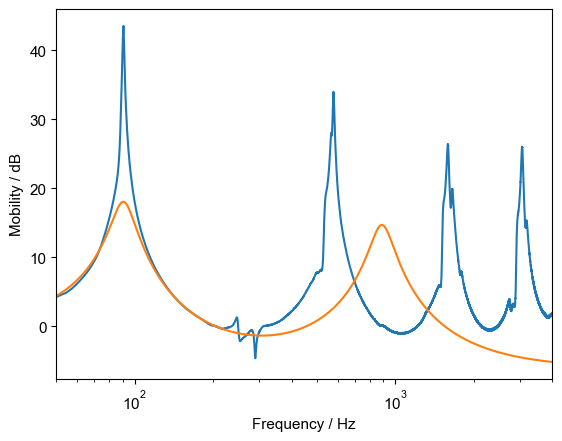

In [404]:
plt.plot(freq, 20*np.log10(tf_center))
plt.plot(np.arange(50, 4000.5, 0.5), 20*np.log10(comsolresults))
plt.xscale("log")
plt.xlabel("Frequency / Hz")
plt.ylabel("Mobility / dB")
plt.xlim([50, 4000])

In [422]:
with open('../resultsLast/resultsFlatmoreVarNoLowFreqLastTestHigh.pickle', 'rb') as handle:
    estimation = pickle.load(handle)

comsolresults = estimation["vel_est"]

(50, 4000)

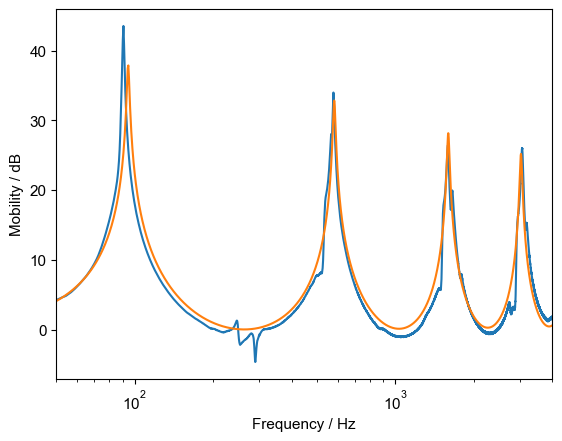

In [425]:
plt.plot(freq, 20*np.log10(tf_center))
plt.plot(np.arange(50, 4000.5, 0.5), 20*np.log10(comsolresults))
plt.xscale("log")
plt.xlabel("Frequency / Hz")
plt.ylabel("Mobility / dB")
plt.xlim([50, 4000])

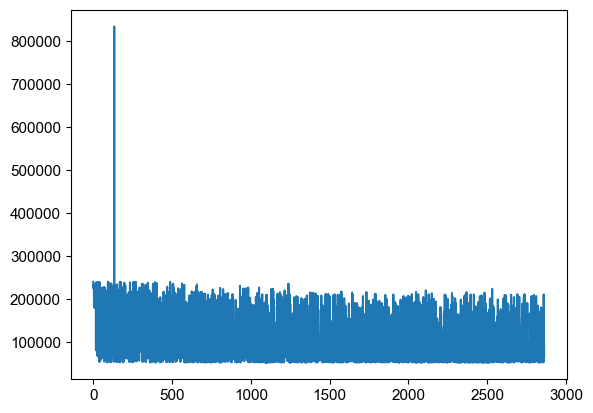

In [434]:
plt.plot(estimation["error"])